In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [31]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
dataset =[train,test]

In [33]:
for data in dataset :
    data.drop(['Loan_ID'],axis = 1,inplace = True)

In [34]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
dataset =[train,test]
for data in dataset :
    data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())


In [11]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [38]:
dataset = [train,test]
for data in dataset :
    data['Gender'].ffill(inplace = True)
    data['Married'].bfill(inplace = True)
    data['Dependents'].bfill(inplace = True)
    data['Self_Employed'].ffill(inplace = True)
    data['Credit_History'].ffill(inplace=True)

In [39]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Dependents'].value_counts())
print(train['Self_Employed'].value_counts())

Male      500
Female    114
Name: Gender, dtype: int64
Yes    399
No     215
Name: Married, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
No     528
Yes     86
Name: Self_Employed, dtype: int64


E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


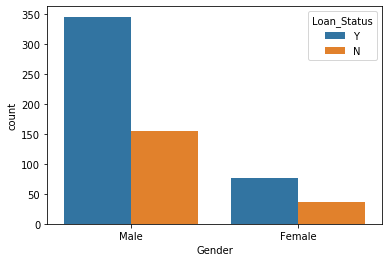

In [70]:
sns.countplot(train['Gender'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


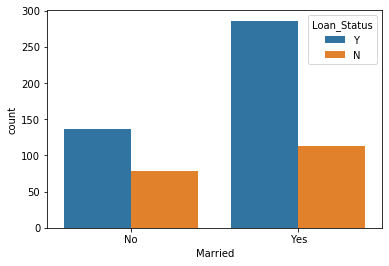

In [71]:
sns.countplot(train['Married'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


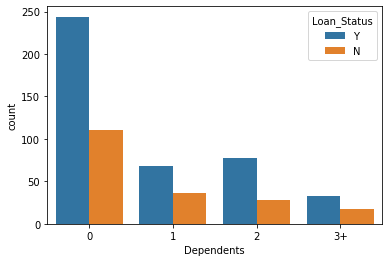

In [41]:
sns.countplot(train['Dependents'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


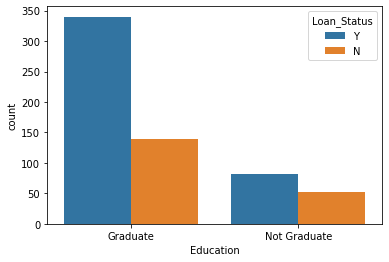

In [73]:
sns.countplot(train['Education'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


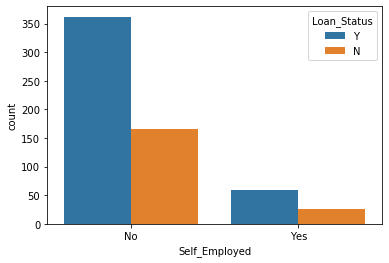

In [42]:
sns.countplot(train['Self_Employed'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


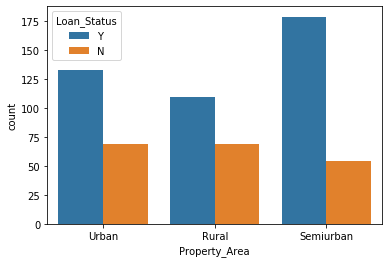

In [43]:
sns.countplot(train['Property_Area'],hue = train['Loan_Status'])

E:\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


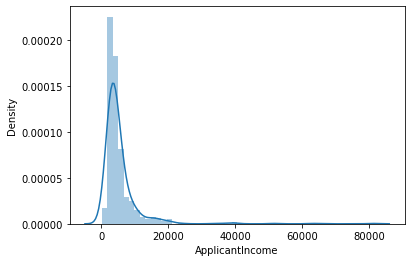

In [44]:
sns.distplot(train['ApplicantIncome'])

E:\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


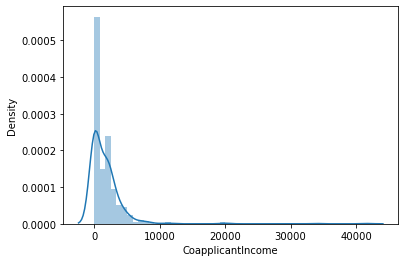

In [77]:
sns.distplot(train['CoapplicantIncome'])

E:\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


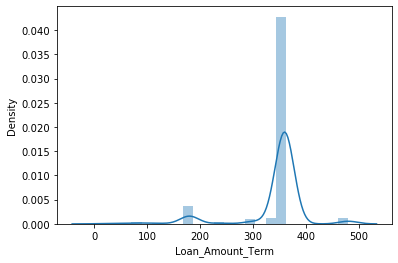

In [78]:
sns.distplot(train['Loan_Amount_Term'])

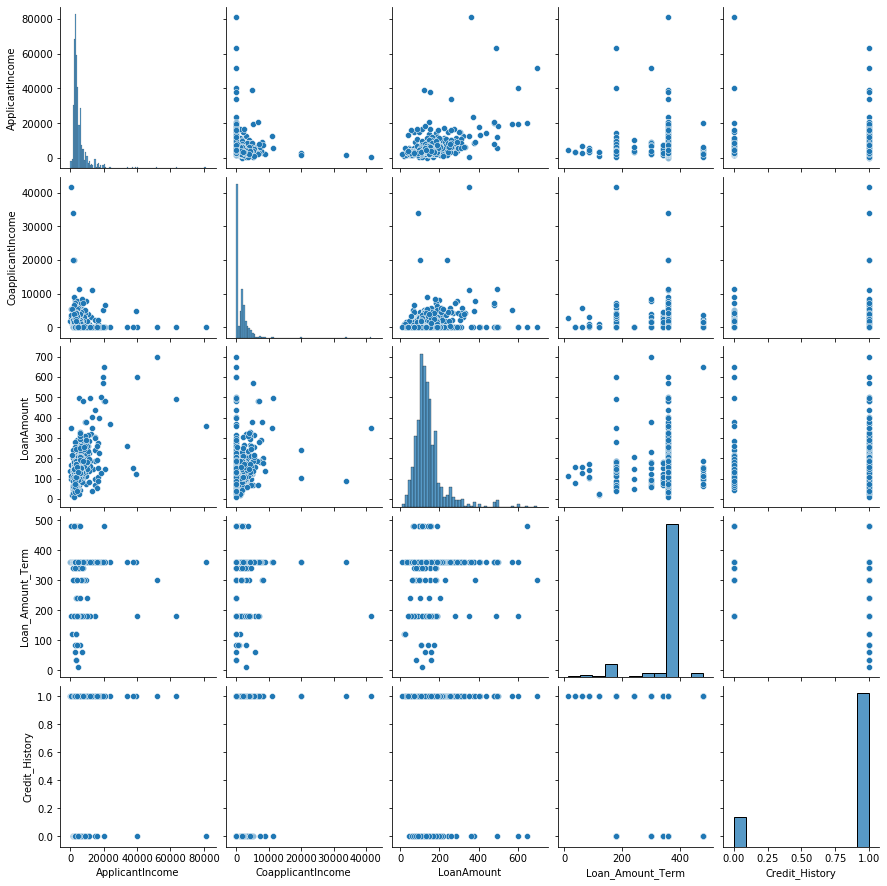

In [45]:
sns.pairplot(data=train)

In [46]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

E:\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


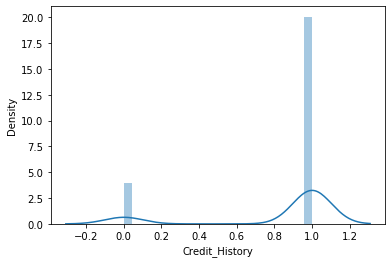

In [47]:
sns.distplot(train['Credit_History'])

In [48]:
dataset =[ train,test]
for data in dataset:
    data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
    data['CoapplicantIncome'] = np.log(data['CoapplicantIncome'])
    data['LoanAmount'] = np.log(data['LoanAmount']) 
    data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term']) 

E:\miniconda\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


E:\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


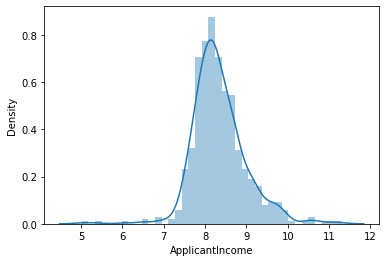

In [49]:
sns.distplot(train['ApplicantIncome']) # 

In [50]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,-inf,4.862066,5.802065,0.835505
std,0.645263,NaN,0.496575,0.312482,0.371027
min,5.010635,-inf,2.197225,2.484907,0.000000
25%,7.964677,-inf,4.607658,5.886104,1.000000
50%,8.246040,7.080284,4.859812,5.886104,1.000000
75%,8.664750,7.739462,5.104426,5.886104,1.000000
max,11.302204,10.637465,6.551080,6.173786,1.000000


In [51]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,-inf,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,-inf,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,-inf,5.231109,5.886104,1.0,Urban,Y


In [52]:
train.drop(['CoapplicantIncome'],inplace = True , axis =1)


In [53]:
test.drop(['CoapplicantIncome'],inplace = True , axis =1)

In [93]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.770262,4.986426,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.756971,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.732482,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.723370,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.771620,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,0.730440,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,0.750796,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,0.787001,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,0.783822,5.231109,5.886104,1.0,Urban,Y


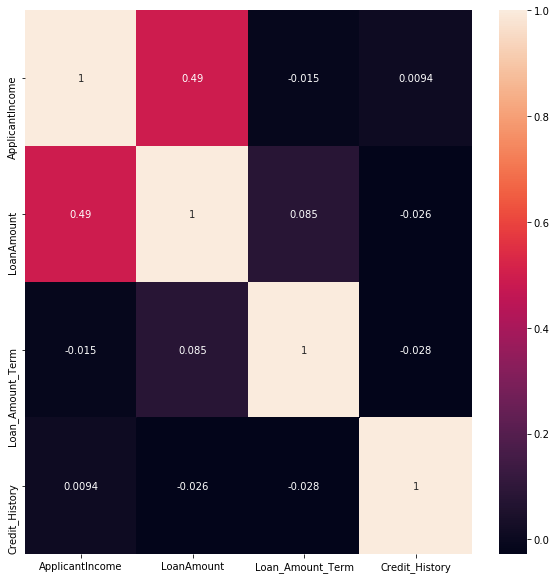

In [54]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data =corr,annot = True)

In [55]:
from sklearn.preprocessing import LabelEncoder
columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
dataset =[train,test]# convert categorical to numerical values

In [56]:
for data in dataset:
    for c in columns:
        data[c] = le.fit_transform(data[c]) 

In [59]:
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [63]:
train['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [64]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,1


In [62]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1.0,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1.0,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1.0,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,1.0,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1.0,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1.0,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,1.0,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1.0,0


In [65]:
train['Credit_History']=train['Credit_History'].astype(dtype ='int64')
test['Credit_History']=test['Credit_History'].astype(dtype ='int64')

In [66]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1,2,1


iloc returns pandas series when one row is selected

In [67]:
x = train.iloc[:,0:10].values # 10 columns

In [70]:
y = train.iloc[:,10].values # only loan status column 10th column

In [71]:
#infinity can be +ve or -ve,if present  replace it 
test.loc[test['ApplicantIncome']== -np.inf]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1,0,0,0,0,-inf,4.997212,5.886104,0,0
116,0,0,0,1,0,-inf,5.192957,5.886104,1,1


In [72]:
test.replace([np.inf, -np.inf],np.nan, inplace= True)

In [73]:
test.dropna(inplace=True) # either drop null values or fill using fill or imputation

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [76]:
logreg= LogisticRegression()
logreg.fit(x,y)
y_pred = logreg.predict(test.values)
acc = round(logreg.score(x,y)*100,2)
print(round(acc,2,),"%")

80.62 %


In [77]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [78]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)
y_ped =knn.predict(x)
acc_knn = round(knn.score(x,y)*100,2)
print(round(acc_knn,2),"%")

81.11 %


In [79]:
from sklearn.metrics import precision_score, recall_score
print("precision:",precision_score(y,y_ped))
print("recall:",recall_score(y,y_ped))

precision: 0.8084677419354839
recall: 0.9502369668246445


In [80]:
from sklearn.metrics import f1_score
f1_score(y,y_ped)

0.8736383442265795

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_ped)

array([[ 97,  95],
       [ 21, 401]], dtype=int64)

In [82]:
import pickle

In [83]:
pickle.dump(logreg,open("logreg.pkl",'wb'))   # in project directory it is stored in name logreg.pkl once u run this command
# wb is used for creating- write binary(wb) read binary(rb)
#dump -used to save the file in pkl format

In [84]:
l = logreg.predict([[1,1,1,0,0,8.612345678,.612345678901234,6.61234567890123,1,2]])

In [86]:
map = {1:"Yes",0:"No"} #create dictionary

In [91]:
a = pickle.load(open("logreg.pkl",'rb')) #read the file

In [92]:
b = a.predict([[1,1,1,0,0,8.612345678,.612345678901234,6.61234567890123,1,2]])
#specify in array format only

In [93]:
val = int(b) #convert arrays of 0s and 1s to int
print("LOAN APPROVED:",map[val])

LOAN APPROVED: Yes


In [96]:
b = a.predict([[0,0,0,0,1,8.430109,4.890349,5.886104,0.0,1]]) # take values of one row from the table
#to cross-verify
val = int(b) #convert arrays of 0s and 1s to int
print("LOAN APPROVED:",map[val])

LOAN APPROVED: No
